In [140]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
## implementar a função que identifica a bandeira
## a função deve receber uma imagem e retornar a bandeira identificada
## a função deve retornar uma lista de tuplas, onde cada tupla contém as coordenadas de um dos cantos da bandeira
## [(PAIS, (x1, y2), (x2, y2)`),(PAIS, (x1, y2), (x2, y2)`),(PAIS, (x1, y2), (x2, y2)`),...]

def identifica_bandeira(img):
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    for y in range(0, gray.shape[0]):
        for x in range(0, gray.shape[1]):
            if (gray[y][x] > 10):
                gray[y][x] = 255
    

    contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    bandeiras = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)  

        roi = img[y:y+h, x:x+w]  
        pais = classifica_bandeira(roi)  
        bandeiras.append((pais, (x, y), (x + w, y + h)))

    return bandeiras

def classifica_bandeira(roi):
    hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    
    cor_sup_esq = hsv[0 + 5, 0 + 5]  
    cor_inf_esq = hsv[hsv.shape[0] - 5, hsv.shape[1] - 5]  

    if cor_sup_esq[0] > 170 and cor_inf_esq[0] < 10:  
        return "peru"
    elif cor_sup_esq[0] > 170 and cor_inf_esq[0] > 10:  
        return "monaco"
    elif cor_sup_esq[0] > 170 and cor_inf_esq[0] > 170:
        return "singapura"
    elif 70 < cor_sup_esq[0] < 80 and cor_inf_esq[0] > 170:  
        return "italia"
    elif 70 < cor_sup_esq[0] < 80 and cor_inf_esq[0] < 20:  
        return "irlanda"

In [142]:
## nao alterar essa função
# Função para desenhar as bandeiras identificadas
def draw_bandeiras(lista_bandeiras, bgr):
    try:
        for bandeira in lista_bandeiras:
            cv2.rectangle(bgr, bandeira[1], bandeira[2], (255, 0, 0), 5)
            cv2.putText(bgr, bandeira[0], bandeira[1], cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        return bgr
    except Exception as e:
        return bgr

[('peru', (192, 496), (457, 674)), ('peru', (726, 162), (985, 370)), ('', (118, 121), (381, 296))]


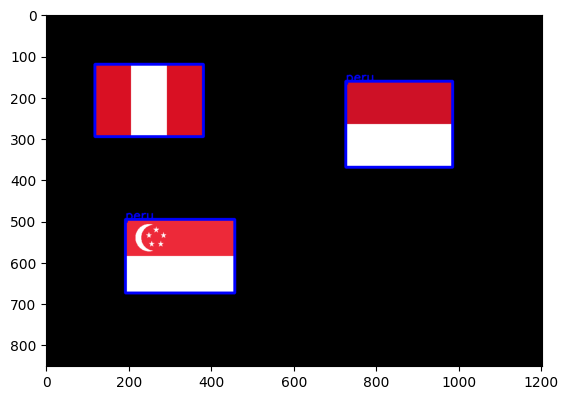

In [143]:
## Para testar a função identifica_bandeira

# Você pode testar a função identifica_bandeira com as imagens de teste fornecidas
# 
img = cv2.imread('img/teste1.png')
# img = cv2.imread('img/teste2.png')
# img = cv2.imread('img/teste3.png')
# img = cv2.imread('img/teste4.png')

# Chamar a função identifica_bandeira
resultado = identifica_bandeira(img)

# Imprimir o resultado da função identifica_bandeira 
print(resultado)

# Desenhar as bandeiras na imagem
bgr = draw_bandeiras(resultado, img)
plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
plt.show()


